In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def drug_freq(top=1):
    drugs_freq = {}
    for file in os.listdir('results-top-100/'):
        data = pd.read_csv('results-top-100/' + file)
        data = data.sort_values(by=['energy'])
        top_data = data[:top]
        for row in top_data.iterrows():
            drug = row[1]['ligand']
            if drug in drugs_freq:
                drugs_freq[drug] += 1
            else :
                drugs_freq[drug] = 1
    return drugs_freq

In [9]:
drugs_freq_1 = drug_freq()

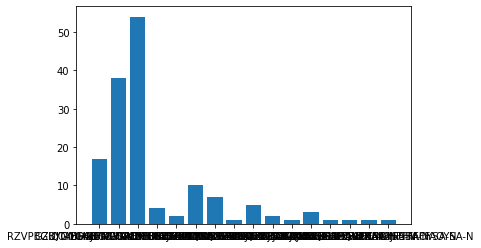

In [11]:
plt.bar(range(len(drugs_freq_1)), list(drugs_freq_1.values()), align='center')
plt.xticks(range(len(drugs_freq_1)), list(drugs_freq_1.keys()))

plt.show()

In [12]:
drugs_freq_1

{'RZVPBGBYGMDSBG-GGAORHGYSA-N': 17,
 'GZUITABIAKMVPG-UHFFFAOYSA-N': 38,
 'QOYHHIBFXOOADH-UHFFFAOYSA-N': 54,
 'LGAJOMLFGCSBFF-OLXDQKQCSA-N': 4,
 'NETZHAKZCGBWSS-CEDHKZHLSA-N': 2,
 'PWNMXPDKBYZCOO-NSHDSACASA-N': 10,
 'FHXBMXJMKMWVRG-SLHNCBLASA-N': 7,
 'OUDSBRTVNLOZBN-UHFFFAOYSA-N': 1,
 'XDVCLKFLRAWGIT-ADOAZJKMSA-N': 5,
 'UDMBCSSLTHHNCD-KQYNXXCUSA-N': 2,
 'WOFMFGQZHJDGCX-ZULDAHANSA-N': 1,
 'DKGZKTPJOSAWFA-UHFFFAOYSA-N': 3,
 'JXZZEXZZKAWDSP-UHFFFAOYSA-N': 1,
 'DYAIAHUQIPBDIP-AXAPSJFSSA-N': 1,
 'HJBWBFZLDZWPHF-UHFFFAOYSA-N': 1,
 'AIZFEOPQVZBNGH-UHFFFAOYSA-N': 1}

In [53]:
def indicators(data):
    corr = data['best Energy'].corr(data['binding score'])
    temp = data.sort_values(by=['binding score'], ascending=False)
    set_1 = list(temp['ligand'][:10])
    temp = data.sort_values(by=['best Energy'])
    set_2 = list(temp['ligand'][:10])
    
    result = {'overlap_' + str(i) : len(set(set_1[:i]) & set(set_2[:i])) / len(set(set_1[:i]) | set(set_2[:i])) for i in [1, 5, 10]}
    result['corr'] = corr
    
    return result

In [63]:
values = []
ranks = []
root = './Bs-Ie/'
for file in os.listdir(root):
    data = pd.read_csv(root + file)
    data_sorted = data.sort_values(by=['binding score'], ascending=False)
    min_energy = data['best Energy'].min()
    for i, value in enumerate(data_sorted.iterrows()):
        if value[1]['best Energy'] == min_energy:
            r = i + 1
            break
    ranks.append(r)
    results = indicators(data)
    values.append((results['corr'], results['overlap_1'], results['overlap_5'], results['overlap_10']))
indicator_val = pd.DataFrame(data=values, columns=['corr', 'overlap_1', 'overlap_5', 'overlap_10'])

In [59]:
indicator_val

,corr,overlap_1,overlap_5,overlap_10
0,0.028920,0.0,0.250000,0.250000
1,-0.145818,0.0,0.111111,0.333333
2,0.286521,0.0,0.000000,0.250000
3,-0.039539,1.0,0.111111,0.250000
4,-0.126329,0.0,0.250000,0.250000
...,...,...,...,...
142,-0.065126,0.0,0.111111,0.250000
143,-0.063819,0.0,0.111111,0.333333
144,0.216136,0.0,0.111111,0.250000
145,-0.086804,0.0,0.111111,0.250000


In [31]:
cor_serie = pd.Series(corrs)

In [32]:
cor_serie.describe()

count    147.000000
mean      -0.067254
std        0.135064
min       -0.350689
25%       -0.160484
50%       -0.073704
75%        0.027408
max        0.286521
dtype: float64

In [ ]:
# overlapping score
overlap_score = []


In [45]:
indicators(data)

{'overlap_1': 0.0, 'overlap_5': 0.1111111111111111, 'overlap_10': 0.25}

In [62]:
data

,ligand,E1,E2,E3,binding score,best Energy
0,COLNVLDHVKWLRT-QMMMGPOBSA-N,-6.2,-6.1,-5.7,70105.41,-6.2
1,MFBCDACCJCDGBA-UHFFFAOYSA-N,-10.0,-9.2,-9.3,126306.37,-10.0
2,AYFVYJQAPQTCCC-GBXIJSLDSA-N,-5.7,-5.7,-4.4,74156.13,-5.7
3,KZTZJUQNSSLNAG-UHFFFAOYSA-N,-4.6,-4.4,-4.2,117532.82,-4.6
4,UDMBCSSLTHHNCD-KQYNXXCUSA-N,-8.2,-8.8,-7.8,289460.05,-8.8
5,JEIPFZHSYJVQDO-UHFFFAOYSA-N,-4.3,-4.0,-3.9,141180.54,-4.3
6,KRMDCWKBEZIMAB-UHFFFAOYSA-N,-8.1,-8.0,-7.8,188626.39,-8.1
7,WDSCBUNMANHPFH-UHFFFAOYSA-N,-6.0,-5.6,-4.7,155050.15,-6.0
8,IKWTVSLWAPBBKU-UHFFFAOYSA-N,-1.5,-1.3,-1.0,171412.94,-1.5
9,DHMQDGOQFOQNFH-UHFFFAOYSA-N,-4.1,-4.1,-3.3,79567.34,-4.1


(array([19.,  6.,  5.,  5., 11.,  6.,  3.,  3.,  0., 89.]),
 array([ 1. ,  3.5,  6. ,  8.5, 11. , 13.5, 16. , 18.5, 21. , 23.5, 26. ]),
 <a list of 10 Patch objects>)

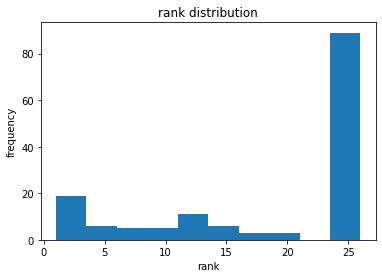

In [68]:
plt.title("rank distribution")
plt.xlabel("rank")
plt.ylabel("frequency")
plt.hist(ranks)

In [69]:
import statistics

In [70]:
statistics.median(ranks)

26